# App Stat Exam2018

## Importing libraries:

In [1]:
#Other good imports                        
from numpy.linalg import matrix_power                                                                       
from iminuit import Minuit                                                                 
from scipy.integrate import quad
import sympy as sp
from sympy import integrate , print_latex
import pandas as pd
from IPython.display import display


#Packages needed for the external functions
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from iminuit.util import make_func_code
from iminuit import describe 


# import sequence of functions from external file
import sys 
sys.path.append('../FINAL_EXAM_2023')
from MyExternalFunctionsForExam import *

Matplotlib_settings()

## 1) Distributions and probabilities

### 1.1) 

In [2]:
#1.1.1)

p = 18/37 

P_25_wins = stats.binom.pmf(25, 50, p)
P_26_or_more_wins = stats.binom.sf(25, 50, p)

print(f'Probability of 25 wins: {P_25_wins:.3f}')
print(f'Probability of 26 or more wins: {P_26_or_more_wins:.3f}')


#1.1.2)

n_tries = range(100)
n_times_loosing = stats.binom.ppf(0.05, n_tries, p)
np.where(n_times_loosing <= 19)[0]
print(f'Number of tries needed to have 19 or less looses: {np.where(n_times_loosing <= 19)[0][-1]}')

Probability of 25 wins: 0.110
Probability of 26 or more wins: 0.369
Number of tries needed to have 19 or less looses: 52


### 1.2)

In [3]:
# two-sided probability of drawing a number between 1.2sigma and 2.4sigma
P_gaussian_nr_between = 2*(stats.norm.sf(1.2)-stats.norm.sf(2.4))

### 1.3)

In [4]:
#1.3.1) Number of daily hospital mistakes follow a Poisson distribution

#1.3.2) Days with more than 8 mistakes are considered “critical days”. 
#If there were 22 “critical days” in a normal year, what is your estimate for the average number of daily mistakes?

p = 22/365
print(f'Probability of 22 critical days in a normal year: {p:.4f}')

#finding the average number of daily mistakes numerically

x_space = np.linspace(0, 8, 1000)
Num_integration = stats.poisson.cdf(8,x_space)

Lambda = x_space[np.where(Num_integration > (1-p))[0][-1]]

print(f'Average number of daily mistakes: {Lambda:.2f}')



Probability of 22 critical days in a normal year: 0.0603
Average number of daily mistakes: 4.87


## 2) Error Propagation

### 2.1) 

removing the outlier from sample 1 gives: 2.532 +/- 0.066
Combining the two results gives: 2.599 +/- 0.031
With a p-value of: 0.249, and a chi2 of: 1.33 / 1 = 1.33


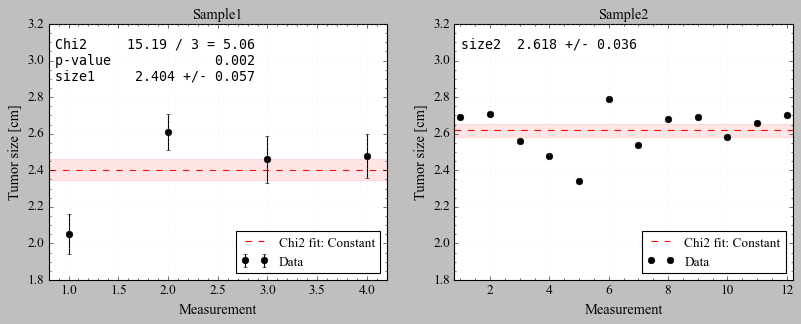

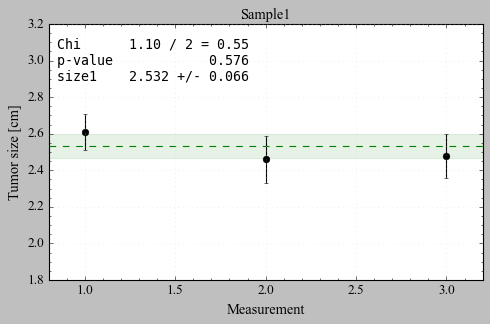

In [5]:
tumor_data1 = np.array([2.05,2.61,2.46,2.48])
tumor_err1 = np.array([0.11,0.10,0.13,0.12])
tumor_data2 = np.array([2.69, 2.71, 2.56, 2.48, 2.34, 2.79, 2.54, 2.68, 2.69, 2.58, 2.66, 2.70])




#2.1.1)

#I do a chi2 test to see if the measurements agree with each other

def constant(x,a):
    return a 

chi2 = Chi2Regression(constant,range(1,5), tumor_data1, tumor_err1)

minuit = Minuit(chi2, a=2.5)
minuit.migrad();
size1 = minuit.values['a']
size1_err = minuit.errors['a']


fig, ax = plt.subplots(1,2,figsize=(12, 4))
ax[0].errorbar(range(1,5), tumor_data1, yerr=tumor_err1, fmt='o', color='k', label='Data')
ax[0].set(xlabel='Measurement', ylabel='Tumor size [cm]', title='Sample1', xlim=(0.8,4.2), ylim=(1.8,3.2))
ax[0].axhline(size1, color='r', linestyle='--', label='Chi2 fit: Constant')
ax[0].axhspan(size1-size1_err, size1+size1_err, color='r', alpha=0.1)
ax[0].legend(loc='lower right')

pval1, chistring1 = Chi2prop(minuit, len(tumor_data1))
d1 = {'Chi2': chistring1, 'p-value': pval1, 'size1':[size1,size1_err]}
text1 = nice_string_output(d1, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text1, ax[0], fontsize=12)


size2 = np.mean(tumor_data2)
size2_err = 1/np.sqrt(len(tumor_data2))*np.std(tumor_data2,ddof=1)

ax[1].errorbar(range(1,13), tumor_data2, fmt='o', color='k', label='Data')
ax[1].set(xlabel='Measurement', ylabel='Tumor size [cm]', title='Sample2', xlim=(0.8,12.2), ylim=(1.8,3.2))
ax[1].axhline(size2, color='r', linestyle='--', label='Chi2 fit: Constant')
ax[1].axhspan(size2-size2_err, size2+size2_err, color='r', alpha=0.1)
ax[1].legend(loc='lower right')

pval2, chistring2 = Chi2prop(minuit, len(tumor_data2))
d2 = {'size2':[size2,size2_err]}
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text2, ax[1], fontsize=12)

#the measurements from sample 1 do not agree with each other due to the outlier (2.05), while the measurements from sample 2 doagree with each other

tumor_data_improv = np.array([2.61,2.46,2.48])
tumor_improv_err = np.array([0.10,0.13,0.12])
chi2 = Chi2Regression(constant,range(1,4), tumor_data_improv, tumor_improv_err)
minuit = Minuit(chi2, a=2.5)
minuit.migrad()
size1_improv, size1_improv_err = minuit.values['a'], minuit.errors['a']
pval_improv, chistring_improv = Chi2prop(minuit, len(tumor_data_improv))

print(f'removing the outlier from sample 1 gives: {size1_improv:.3f} +/- {size1_improv_err:.3f}')
fig,ax = plt.subplots(figsize=(7, 4))
ax.errorbar(range(1,4), tumor_data_improv, yerr=tumor_improv_err, fmt='o', color='k', label='Data')
ax.axhline(size1_improv, color='g', linestyle='--', label='Chi2 fit: whitout outlier')
ax.axhspan(size1_improv-size1_improv_err, size1_improv+size1_improv_err, color='g', alpha=0.1)
ax.set(xlabel='Measurement', ylabel='Tumor size [cm]', title='Sample1', xlim=(0.8,3.2), ylim=(1.8,3.2))

d = {'Chi': chistring_improv, 'p-value': pval_improv, 'size1':[size1_improv,size1_improv_err]}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=12)


#2.1.2) The most precise measurement is the one with the smallest error, so the measurement from sample 2 is the most precise


#2.1.3) The best estimate of the tumor size would be to combine the two results in a weighted mean


chi2 = Chi2Regression(constant,range(1,3), [size1_improv, size2], [size1_improv_err, size2_err])
minuit = Minuit(chi2, a=2.5)
minuit.migrad()

size_combined, size_combined_err = minuit.values['a'], minuit.errors['a']
pval_combined, chistring_combined = Chi2prop(minuit, len([size1_improv, size2]))

print(f'Combining the two results gives: {size_combined:.3f} +/- {size_combined_err:.3f}')
print(f'With a p-value of: {pval_combined:.3f}, and a chi2 of: {chistring_combined}')


### 2.2) 

In [11]:
c = 299700000 #m/s
h = 6.626e-34 #J*s
kb = 1.381e-23 #J/K


plancks_law = '2*h*nu**3/c**2/(exp(h*nu/(kb*T))-1)'         # B(nu,T)
plancks_law = '2*(6.626e-34)*nu**3/(299700000)**2/(exp(6.626e-34*nu/(1.381e-23*T))-1)'         # B(nu,T)



#2.2.1)
eq , func, err_func, contrib = Errorpropagation(plancks_law, 'nu T')

#Given values of ν = (0.566 ± 0.025) × 1015 Hz and T = (5.50 ± 0.29) × 103 K (uncorrelated), what is the expected spectral radiance, B

nu = 0.566e15
nu_err = 0.025e15
T = 5.50e3
T_err = 0.29e3

B = func(nu,T)
B_err = err_func(nu,T,nu_err,T_err)

print(f'The expected spectral radiance is: ({B:.3} +/- {B_err:.2}) W/m^2/sr/Hz')



#2.2.2) Now with correlation coefficient of 0.87

eq_cor, func_cor, err_func_cor = Errorpropagation(plancks_law, 'nu T', rho=0.87)
B_cor = func_cor(nu,T)
B_err_cor = err_func_cor(nu,T,nu_err,T_err)

print(f'The correlated spectral radiance is: ({B_cor:.3} +/- {B_err_cor:.2}) W/m^2/sr/Hz')
print(f'which is a difference in uncertainty of: {B_err_cor-B_err:.3} W/m^2/sr/Hz')


The expected spectral radiance is: (1.93e-08 +/- 5.3e-09) W/m^2/sr/Hz
The correlated spectral radiance is: (1.93e-08 +/- 3.7e-09) W/m^2/sr/Hz
which is a difference in uncertainty of: -1.64e-09 W/m^2/sr/Hz


## 3) Simulation / Monte Carlo 

### 3.1)

In [42]:
# PDF: f(x) = C*(1-exp(-a*x)) on x=[0,2] and a=2


#3.1.1) 
#analytical solution using sympy
x = sp.symbols('x')
f = '(1-exp(-2*x))'
integral = integrate(f, (x, 0, 2))
C = 1/integral
print(f'The normalization constant is: {C} = {C.evalf():.3f}')
f_norm = f+'*'+str(C)

mean = integrate(f_norm+'*x', (x, 0, 2))
print(f'The mean is: {mean} = {mean.evalf():.3f}')

RMS = sp.sqrt(integrate(f_norm+'*x**2', (x, 0, 2)))
print(f'The RMS is: {RMS} = {RMS.evalf():.3f}')

#3.1.2) To simulatate both the Inverse transform and the accept/reject can be used, since the PDF is both bounded and invertible. 

#3.1.3) The inverse transform method is used here

def PDF_func(x):
    return C.eval()*(1-np.exp(-2*x))

inv_trans = inverse_transform(f_norm, 500, 0, 2)


The normalization constant is: 1/(exp(-4)/2 + 3/2) = 0.663
The mean is: -exp(4)/(2 + 6*exp(4)) + 5/(2 + 6*exp(4)) + 4*exp(4)/(1 + 3*exp(4)) = 1.175
The RMS is: sqrt(-exp(4)/(2 + 6*exp(4)) + 13/(2 + 6*exp(4)) + 16*exp(4)/(3 + 9*exp(4))) = 1.281


NameError: name 'LambertW' is not defined

In [ ]:
#

## 4) Statistical Tests

### 4.1)

## 5) Fitting data

### 5.1)

### 5.2)